### IMPORTS

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import YExplorer
sns.set()
from IPython.display import display,HTML
import pandas_profiling
import numpy as np
import missingno as msno
from dython.nominal import associations
from scipy.stats import norm, boxcox,skew
from geopy import distance
%matplotlib inline

### Data Ingestion

In [150]:
data = pd.read_csv("Train.csv")
riders = pd.read_csv("Riders.csv")
test_zindi = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")

### Let's see what we have here

In [6]:
data.head().T

0               1  \
Order No                                   Order_No_4211  Order_No_25375   
User Id                                      User_Id_633    User_Id_2285   
Vehicle Type                                        Bike            Bike   
Platform Type                                          3               3   
Personal or Business                            Business        Personal   
Placement - Day of Month                               9              12   
Placement - Weekday (Mo = 1)                           5               5   
Placement - Time                              9:35:46 AM     11:16:16 AM   
Confirmation - Day of Month                            9              12   
Confirmation - Weekday (Mo = 1)                        5               5   
Confirmation - Time                           9:40:10 AM     11:23:21 AM   
Arrival at Pickup - Day of Month                       9              12   
Arrival at Pickup - Weekday (Mo = 1)                   5               5   
Arrival at Pickup - Time                     10:04:47 AM     11:40:22 AM   
Pickup - Day of Month                                  9              12   
Pickup - Weekday (Mo = 1)                              5               5   
Pickup - Time                                10:27:30 AM     11:44:09 AM   
Arrival at Destination - Day of Month                  9              12   
Arrival at Destination - Weekday (Mo = 1)              5               5   
Arrival at Destination - Time                10:39:55 AM     12:17:22 PM   
Distance (KM)                                          4              16   
Temperature                                         20.4            26.4   
Precipitation in millimeters                         NaN             NaN   
Pickup Lat                                      -1.31775        -1.35145   
Pickup Long                                      36.8304         36.8993   
Destination Lat                                 -1.30041          -1.295   
Destination Long                                 36.8297         36.8144   
Rider Id                                    Rider_Id_432    Rider_Id_856   
Time from Pickup to Arrival                          745            1993   

                                                       2              3  \
Order No                                   Order_No_1899  Order_No_9336   
User Id                                      User_Id_265   User_Id_1402   
Vehicle Type                                        Bike           Bike   
Platform Type                                          3              3   
Personal or Business                            Business       Business   
Placement - Day of Month                              30             15   
Placement - Weekday (Mo = 1)                           2              5   
Placement - Time                             12:39:25 PM     9:25:34 AM   
Confirmation - Day of Month                           30             15   
Confirmation - Weekday (Mo = 1)                        2              5   
Confirmation - Time                          12:42:44 PM     9:26:05 AM   
Arrival at Pickup - Day of Month                      30             15   
Arrival at Pickup - Weekday (Mo = 1)                   2              5   
Arrival at Pickup - Time                     12:49:34 PM     9:37:56 AM   
Pickup - Day of Month                                 30             15   
Pickup - Weekday (Mo = 1)                              2              5   
Pickup - Time                                12:53:03 PM     9:43:06 AM   
Arrival at Destination - Day of Month                 30             15   
Arrival at Destination - Weekday (Mo = 1)              2              5   
Arrival at Destination - Time                 1:00:38 PM    10:05:27 AM   
Distance (KM)                                          3              9   
Temperature                                          NaN           19.2   
Precipitation in millimeters                     

In [11]:
test_zindi.head().T

0               1  \
Order No                              Order_No_19248  Order_No_12736   
User Id                                 User_Id_3355    User_Id_3647   
Vehicle Type                                    Bike            Bike   
Platform Type                                      3               3   
Personal or Business                        Business        Business   
Placement - Day of Month                          27              17   
Placement - Weekday (Mo = 1)                       3               5   
Placement - Time                          4:44:10 PM     12:57:35 PM   
Confirmation - Day of Month                       27              17   
Confirmation - Weekday (Mo = 1)                    3               5   
Confirmation - Time                       4:44:29 PM     12:59:17 PM   
Arrival at Pickup - Day of Month                  27              17   
Arrival at Pickup - Weekday (Mo = 1)               3               5   
Arrival at Pickup - Time                  4:53:04 PM      1:20:27 PM   
Pickup - Day of Month                             27              17   
Pickup - Weekday (Mo = 1)                          3               5   
Pickup - Time                             5:06:47 PM      1:25:37 PM   
Distance (KM)                                      8               5   
Temperature                                      NaN             NaN   
Precipitation in millimeters                     NaN             NaN   
Pickup Lat                                  -1.33327        -1.27264   
Pickup Long                                  36.8708         36.7947   
Destination Lat                             -1.30525        -1.27701   
Destination Long                             36.8224         36.8239   
Rider Id                                Rider_Id_192    Rider_Id_868   

                                                 2               3  \
Order No                              Order_No_768  Order_No_15332   
User Id                               User_Id_2154    User_Id_2910   
Vehicle Type                                  Bike            Bike   
Platform Type                                    3               3   
Personal or Business                      Business        Business   
Placement - Day of Month                        27              17   
Placement - Weekday (Mo = 1)                     4               1   
Placement - Time                       11:08:14 AM      1:51:35 PM   
Confirmation - Day of Month                     27              17   
Confirmation - Weekday (Mo = 1)                  4               1   
Confirmation - Time                    11:25:05 AM      1:53:27 PM   
Arrival at Pickup - Day of Month                27              17   
Arrival at Pickup - Weekday (Mo = 1)             4               1   
Arrival at Pickup - Time               11:33:20 AM      2:02:41 PM   
Pickup - Day of Month                           27              17   
Pickup - Weekday (Mo = 1)                        4               1   
Pickup - Time                          11:57:54 AM      2:16:52 PM   
Distance (KM)                                    5               5   
Temperature                                   22.8            24.5   
Precipitation in millimeters                   NaN             NaN   
Pickup Lat                                -1.29089         -1.2905   
Pickup Long                                 36.823         36.8096   
Destination Lat                           -1.27657        -1.30338   
Destination Long                           36.8514         36.7907   
Rider Id                               Rider_Id_26    Rider_Id_685   

                                                   4  
Order No                              Order_No_21373  
User Id                                 User_Id_1205  
Vehicle Type                                    Bike  
Platform Type                                      3  
Personal or Business                        Business  
Placement - Day of Month   

In [58]:
set(data.columns).difference(set(test_zindi.columns))

{'Arrival at Destination - Day of Month',
 'Arrival at Destination - Time',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Time from Pickup to Arrival'}

In [33]:
riders.head()

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
0  Rider_Id_396          2946  2298            14.0           1159
1  Rider_Id_479           360   951            13.5            176
2  Rider_Id_648          1746   821            14.3            466
3  Rider_Id_753           314   980            12.5             75
4  Rider_Id_335           536  1113            13.7            156

In [34]:
submission.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                        567.0
1  Order_No_12736                       4903.0
2    Order_No_768                       5649.0
3  Order_No_15332                          NaN
4  Order_No_21373                          NaN

### Cleaning, Epxploration and Analyzing

In [8]:
profile = data.profile_report(title='Data report')
profile.to_file(output_file="Data_report.html")
display(HTML('<iframe src="Data_report.html" height="500" width="100%"></iframe> '))

In [80]:
data["Vehicle Type"].unique(),test_zindi["Vehicle Type"].unique()

(array(['Bike'], dtype=object), array(['Bike'], dtype=object))

In [151]:
test_zindi.drop(columns=["Vehicle Type"],inplace=True)
data.drop(columns=["Vehicle Type"],inplace=True)

In [19]:
data.shape, test_zindi.shape

((21201, 28), (7068, 24))

#### Change types

In [152]:
from pandas.api.types import is_numeric_dtype
def change_types(df):
    int_to_float_columns = ["Time from Pickup to Arrival","Distance (KM)"]
    for column in df.columns:
        if(not is_numeric_dtype(df[column])):
            df[column] = df[column].astype("category")
        elif(np.issubdtype(df[column], np.int64) and column not in int_to_float_columns):
            df[column] = df[column].astype("category")
        elif(column in int_to_float_columns):
            df[column] = df[column].astype("float")

In [153]:
change_types(data)
change_types(test_zindi)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 28 columns):
Order No                                     21201 non-null category
User Id                                      21201 non-null category
Platform Type                                21201 non-null category
Personal or Business                         21201 non-null category
Placement - Day of Month                     21201 non-null category
Placement - Weekday (Mo = 1)                 21201 non-null category
Placement - Time                             21201 non-null category
Confirmation - Day of Month                  21201 non-null category
Confirmation - Weekday (Mo = 1)              21201 non-null category
Confirmation - Time                          21201 non-null category
Arrival at Pickup - Day of Month             21201 non-null category
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null category
Arrival at Pickup - Time                     21201 non-null cat

#### test if data was splitted with respect to time

In [154]:
train_order_number = data["order_number"] = data["Order No"].apply(lambda o:int(o.replace("Order_No_",""))).astype("int")
test_order_number = test_zindi["order_number"] = test_zindi["Order No"].apply(lambda o:int(o.replace("Order_No_",""))).astype("int")

In [48]:
train_order_number.min(),train_order_number.max(),test_order_number.min(),test_order_number.max()

(1, 28268, 0, 28265)

#### Some fact checking

In [30]:
# test if orders are not mixed
train_orders_set = set(train_order_number)
test_orders_set = set(test_order_number)
train_orders_set.intersection(test_orders_set)

set()

In [31]:
# test if number of unique commands is equal to the number of observations   
len(train_orders_set.union(test_orders_set)) == len(data)+len(test_zindi)

True

In [32]:
print(sorted(train_orders_set))

[1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 16, 17, 18, 20, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 77, 79, 80, 81, 83, 84, 86, 88, 89, 91, 92, 95, 96, 97, 99, 100, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 114, 115, 117, 118, 120, 121, 122, 123, 125, 126, 130, 131, 132, 133, 134, 136, 139, 140, 141, 142, 144, 145, 148, 149, 150, 151, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 182, 183, 184, 185, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 210, 211, 212, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 258, 259, 260, 262, 263, 266, 267, 268, 274, 275, 276, 277, 281, 283, 284, 285, 286, 288, 289, 290, 29

#### Missing values

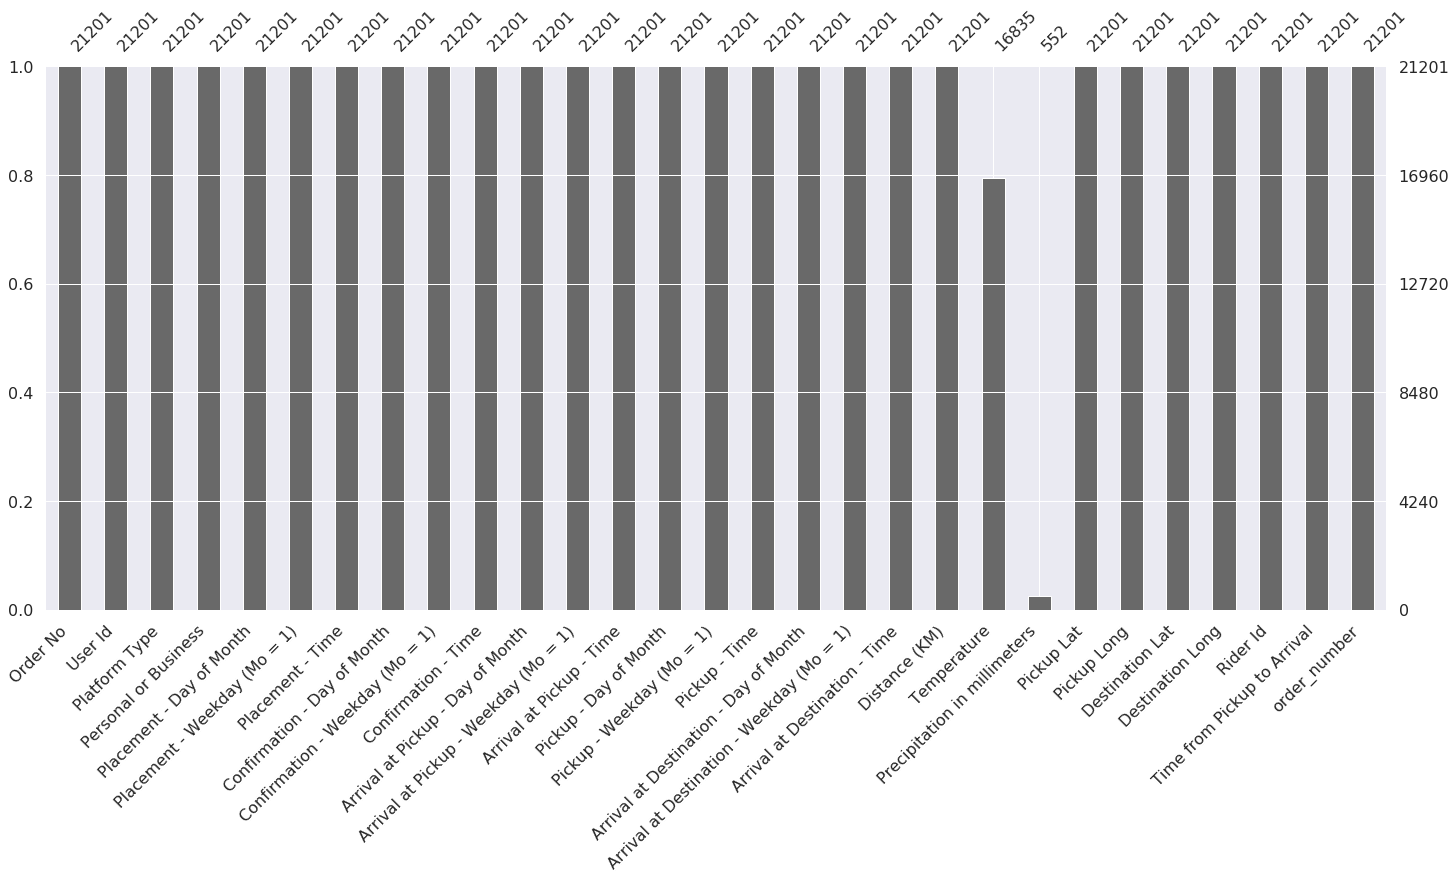

In [49]:
msno.bar(data)

In [52]:
### checks if order numbers are sequential in time
data.sort_values(by="order_number")

Order No       User Id Platform Type Personal or Business  \
6831       Order_No_1   User_Id_556             1             Personal   
720        Order_No_2  User_Id_3517             3             Business   
18360      Order_No_3   User_Id_635             3             Business   
694        Order_No_4  User_Id_2377             3             Personal   
20620      Order_No_6  User_Id_3550             1             Personal   
11872      Order_No_7    User_Id_60             3             Business   
2745       Order_No_8  User_Id_3661             3             Business   
5234       Order_No_9   User_Id_868             3             Business   
11976     Order_No_10   User_Id_491             1             Personal   
14795     Order_No_12  User_Id_1934             2             Personal   
12715     Order_No_16   User_Id_346             3             Business   
18858     Order_No_17  User_Id_2346             1             Personal   
12600     Order_No_18  User_Id_1205             3             Business   
18386     Order_No_20  User_Id_2412             3             Business   
1907      Order_No_23  User_Id_1578             3             Business   
10762     Order_No_24   User_Id_238             3             Business   
2053      Order_No_25  User_Id_3647             3             Business   
10270     Order_No_27   User_Id_577             1             Personal   
17554     Order_No_28  User_Id_1840             1             Personal   
13144     Order_No_29  User_Id_2207             3             Business   
16049     Order_No_30   User_Id_419             3             Business   
2512      Order_No_31   User_Id_496             3             Business   
13431     Order_No_32  User_Id_3382             1             Personal   
19822     Order_No_33   User_Id_633             3             Business   
10312     Order_No_34   User_Id_426             3             Business   
3730      Order_No_35  User_Id_2801             3             Business   
8117      Order_No_36  User_Id_1329             3             Business   
14040     Order_No_37  User_Id_2082             3             Personal   
8755      Order_No_38  User_Id_3673             1             Personal   
20604     Order_No_41  User_Id_3109             2             Personal   
...               ...           ...           ...                  ...   
12872  Order_No_28226  User_Id_3491             3             Business   
14184  Order_No_28227    User_Id_71             3             Business   
4792   Order_No_28228  User_Id_2468             3             Business   
15848  Order_No_28229  User_Id_2100             3             Business   
6475   Order_No_28231   User_Id_496             3             Business   
20640  Order_No_28232  User_Id_3247             3             Business   
66     Order_No_28233  User_Id_1224             1             Personal   
12633  Order_No_28234   User_Id_893             3             Business   
6342   Order_No_28235   User_Id_393             3             Business   
16692  Order_No_28236  User_Id_3557             3             Business   
13693  Order_No_28237  User_Id_3635             1             Business   
18645  Order_No_28238  User_Id_1133             3             Business   
478    Order_No_28239  User_Id_2548             2             Business   
587    Order_No_28240  User_Id_2523             3             Business   
12021  Order_No_28241  User_Id_2400             2             Personal   
15749  Order_No_28244  User_Id_3295             3             Business   
11803  Order_No_28245    User_Id_33             3             Personal   
18368  Order_No_28247  User_Id_3677             1             Personal   
2136   Order_No_28248  User_Id_1075             3             Business   
18944  Order_No_28251   User_Id_435             3             Business   
3981   Order_No_28253   User_Id_909             3             Business   
11224  Order_No_28254  User_Id_2828             3             Business   
16811  Order_No_2

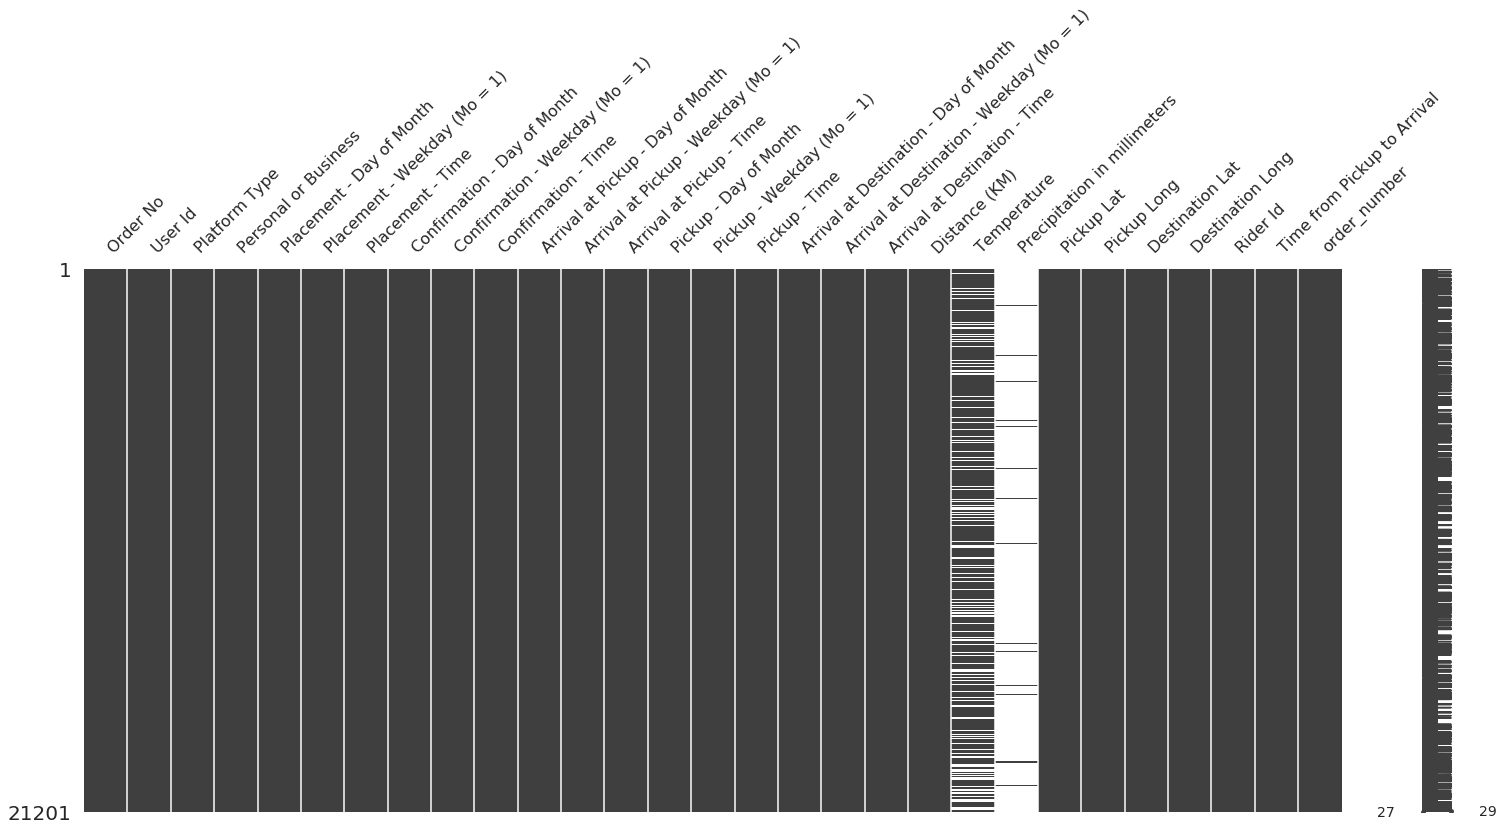

In [50]:
msno.matrix(data.sort_values(by="order_number"))

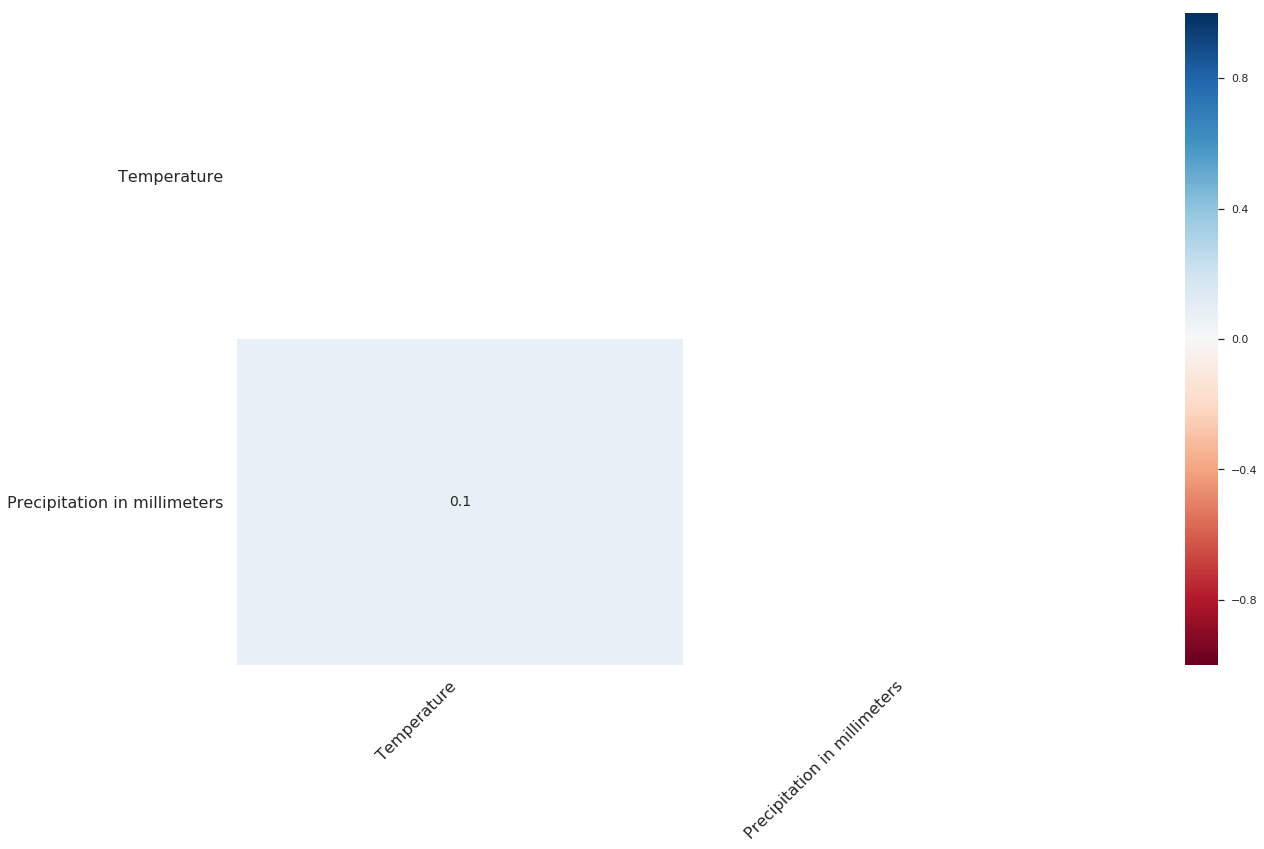

In [41]:
msno.heatmap(data)

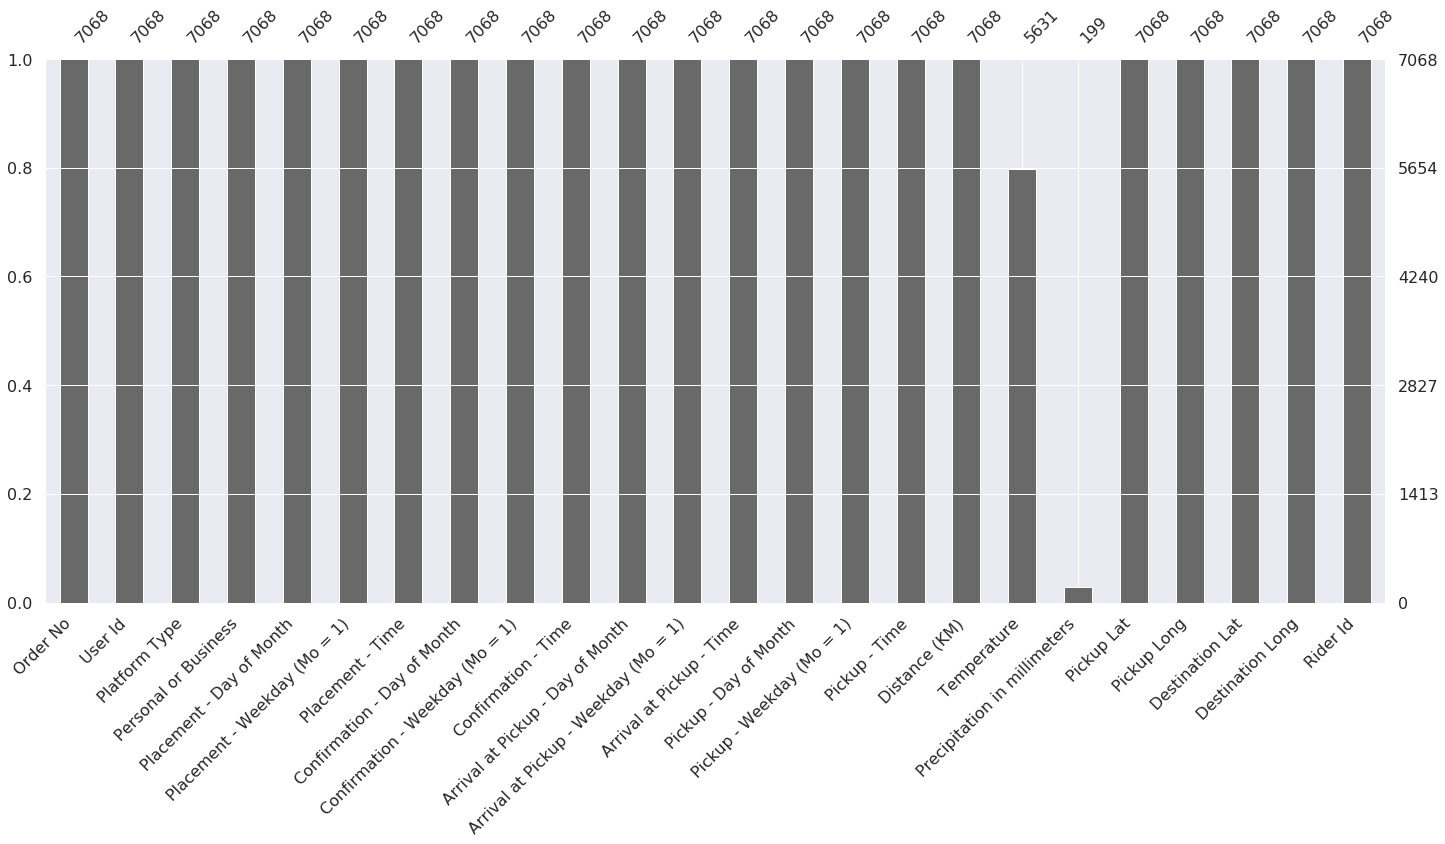

In [43]:
msno.bar(test_zindi)

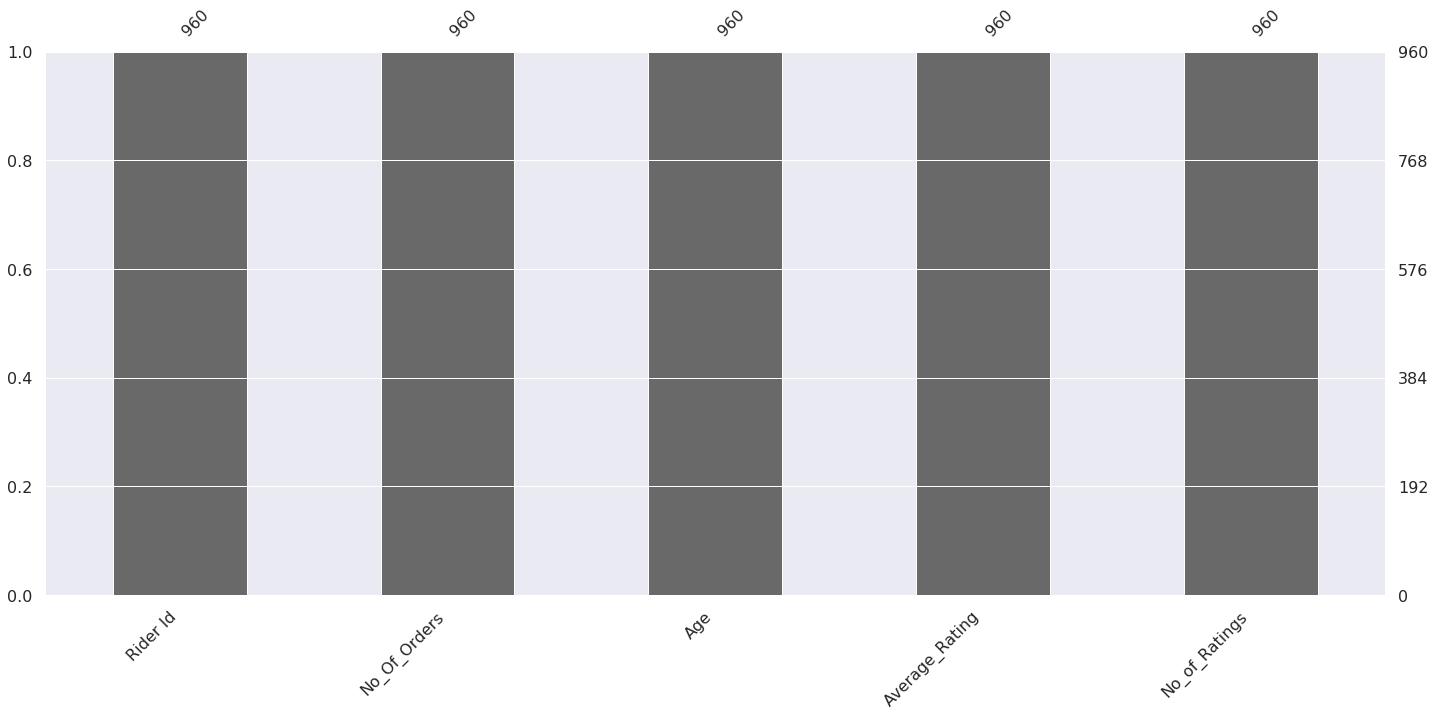

In [42]:
msno.bar(riders)

#### check the validity of Time from Pickup to Arrival by calculating it from the columns

In [44]:
duree = (pd.to_datetime(data["Arrival at Destination - Time"])-pd.to_datetime(data["Pickup - Time"])).astype('timedelta64[s]')
(duree == data["Time from Pickup to Arrival"]).sum()/len(data)

1.0

#### Fill missing values

In [155]:
# fill temperature with mean
mean_temp = data.Temperature.mean()
data.Temperature.fillna(value=mean_temp,inplace=True)
test_zindi.Temperature.fillna(value=mean_temp,inplace=True)

data.drop(columns=["Precipitation in millimeters","order_number"],inplace=True)
test_zindi.drop(columns=["Precipitation in millimeters","order_number"],inplace=True)

#### Merge data with riders

In [87]:
set(data["Rider Id"]).difference(set(riders["Rider Id"])), set(test_zindi["Rider Id"]).difference(set(riders["Rider Id"]))

(set(), set())

In [156]:
data = data.merge(riders,on="Rider Id")
test_zindi = test_zindi.merge(riders,on="Rider Id")

In [89]:
data.head().T

0               1  \
Order No                                   Order_No_4211  Order_No_27440   
User Id                                      User_Id_633    User_Id_2642   
Platform Type                                          3               3   
Personal or Business                            Business        Personal   
Placement - Day of Month                               9              18   
Placement - Weekday (Mo = 1)                           5               5   
Placement - Time                              9:35:46 AM      3:41:17 PM   
Confirmation - Day of Month                            9              18   
Confirmation - Weekday (Mo = 1)                        5               5   
Confirmation - Time                           9:40:10 AM      3:41:30 PM   
Arrival at Pickup - Day of Month                       9              18   
Arrival at Pickup - Weekday (Mo = 1)                   5               5   
Arrival at Pickup - Time                     10:04:47 AM      4:07:16 PM   
Pickup - Day of Month                                  9              18   
Pickup - Weekday (Mo = 1)                              5               5   
Pickup - Time                                10:27:30 AM      4:13:37 PM   
Arrival at Destination - Day of Month                  9              18   
Arrival at Destination - Weekday (Mo = 1)              5               5   
Arrival at Destination - Time                10:39:55 AM      5:01:43 PM   
Distance (KM)                                          4              20   
Temperature                                         20.4            24.5   
Pickup Lat                                      -1.31775        -1.32677   
Pickup Long                                      36.8304         36.7878   
Destination Lat                                 -1.30041        -1.35624   
Destination Long                                 36.8297         36.9043   
Rider Id                                    Rider_Id_432    Rider_Id_432   
Time from Pickup to Arrival                          745            2886   
No_Of_Orders                                        1637            1637   
Age                                                 1309            1309   
Average_Rating                                      13.8            13.8   
No_of_Ratings                                        549             549   

                                                        2               3  \
Order No                                   Order_No_14170  Order_No_21727   
User Id                                      User_Id_3339    User_Id_3523   
Platform Type                                           3               3   
Personal or Business                             Business        Personal   
Placement - Day of Month                               31               2   
Placement - Weekday (Mo = 1)                            5               2   
Placement - Time                              12:51:41 PM      7:12:10 AM   
Confirmation - Day of Month                            31               2   
Confirmation - Weekday (Mo = 1)                         5               2   
Confirmation - Time                            1:12:49 PM      7:12:29 AM   
Arrival at Pickup - Day of Month                       31               2   
Arrival at Pickup - Weekday (Mo = 1)                    5               2   
Arrival at Pickup - Time                       1:20:02 PM      7:35:24 AM   
Pickup - Day of Month                                  31               2   
Pickup - Weekday (Mo = 1)                               5               2   
Pickup - Time                                  1:33:08 PM      7:38:46 AM   
Arrival at Destination - Day of Month                  31               2   
Arrival at Destination - Weekday (Mo = 1)               5               2   
Arrival at Destination - Time                  2:16:43 PM      8:28:32 AM   
Distance (KM)                                           6              18   
Tempe

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 31 columns):
Order No                                     21201 non-null category
User Id                                      21201 non-null category
Platform Type                                21201 non-null category
Personal or Business                         21201 non-null category
Placement - Day of Month                     21201 non-null category
Placement - Weekday (Mo = 1)                 21201 non-null category
Placement - Time                             21201 non-null category
Confirmation - Day of Month                  21201 non-null category
Confirmation - Weekday (Mo = 1)              21201 non-null category
Confirmation - Time                          21201 non-null category
Arrival at Pickup - Day of Month             21201 non-null category
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null category
Arrival at Pickup - Time                     21201 non-null cat

In [157]:
data = data.astype({"Rider Id":"category","Age":"float","No_Of_Orders":"float","No_of_Ratings":"float","Average_Rating":"float"},copy=False)
test_zindi = test_zindi.astype({"Rider Id":"category","Age":"float","No_Of_Orders":"float","No_of_Ratings":"float","Average_Rating":"float"},copy=False)

In [92]:
test_zindi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 7067
Data columns (total 27 columns):
Order No                                7068 non-null category
User Id                                 7068 non-null category
Platform Type                           7068 non-null category
Personal or Business                    7068 non-null category
Placement - Day of Month                7068 non-null category
Placement - Weekday (Mo = 1)            7068 non-null category
Placement - Time                        7068 non-null category
Confirmation - Day of Month             7068 non-null category
Confirmation - Weekday (Mo = 1)         7068 non-null category
Confirmation - Time                     7068 non-null category
Arrival at Pickup - Day of Month        7068 non-null category
Arrival at Pickup - Weekday (Mo = 1)    7068 non-null category
Arrival at Pickup - Time                7068 non-null category
Pickup - Day of Month                   7068 non-null category
Pickup - We

### Correlation study

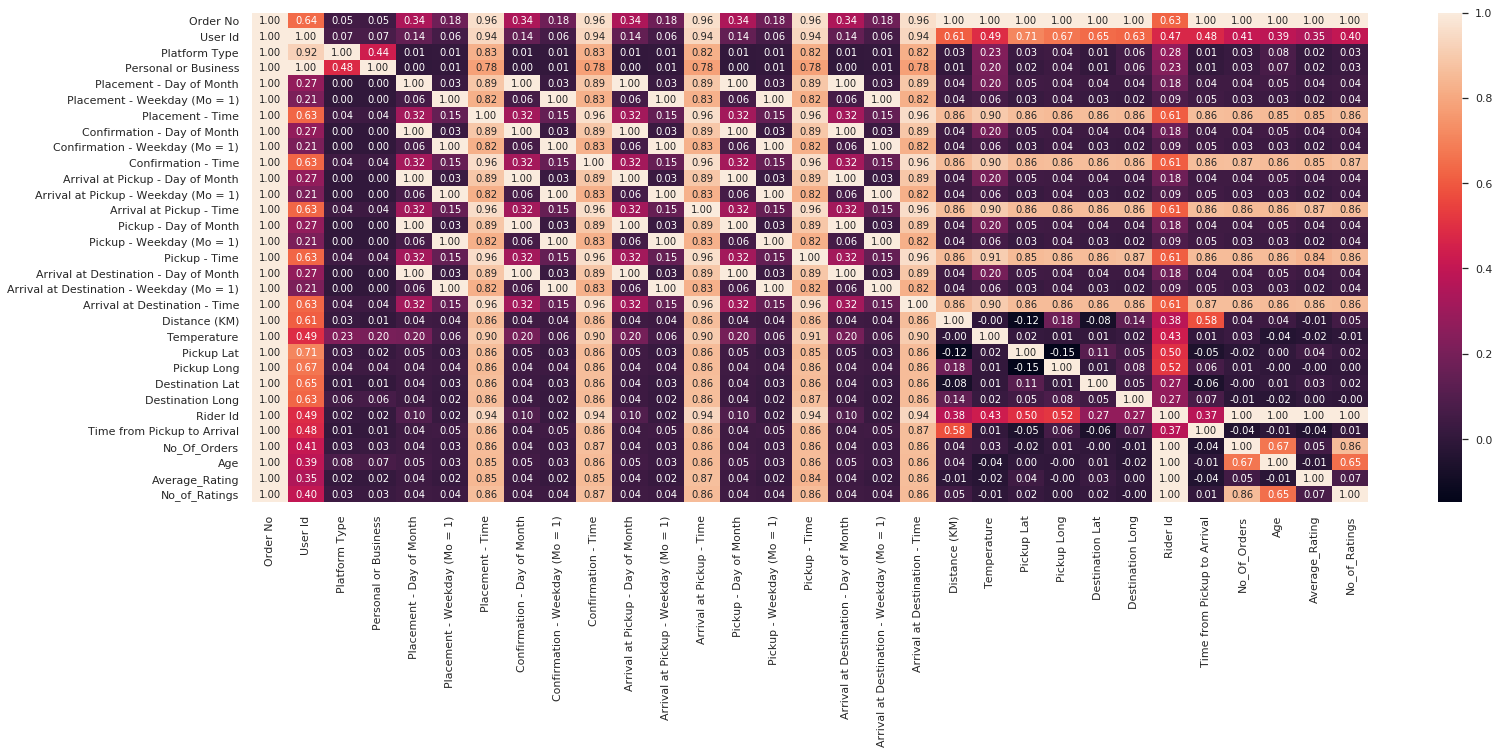

In [93]:
nominal_columns = list(data.select_dtypes(exclude=["number"]).columns)
associations(data,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

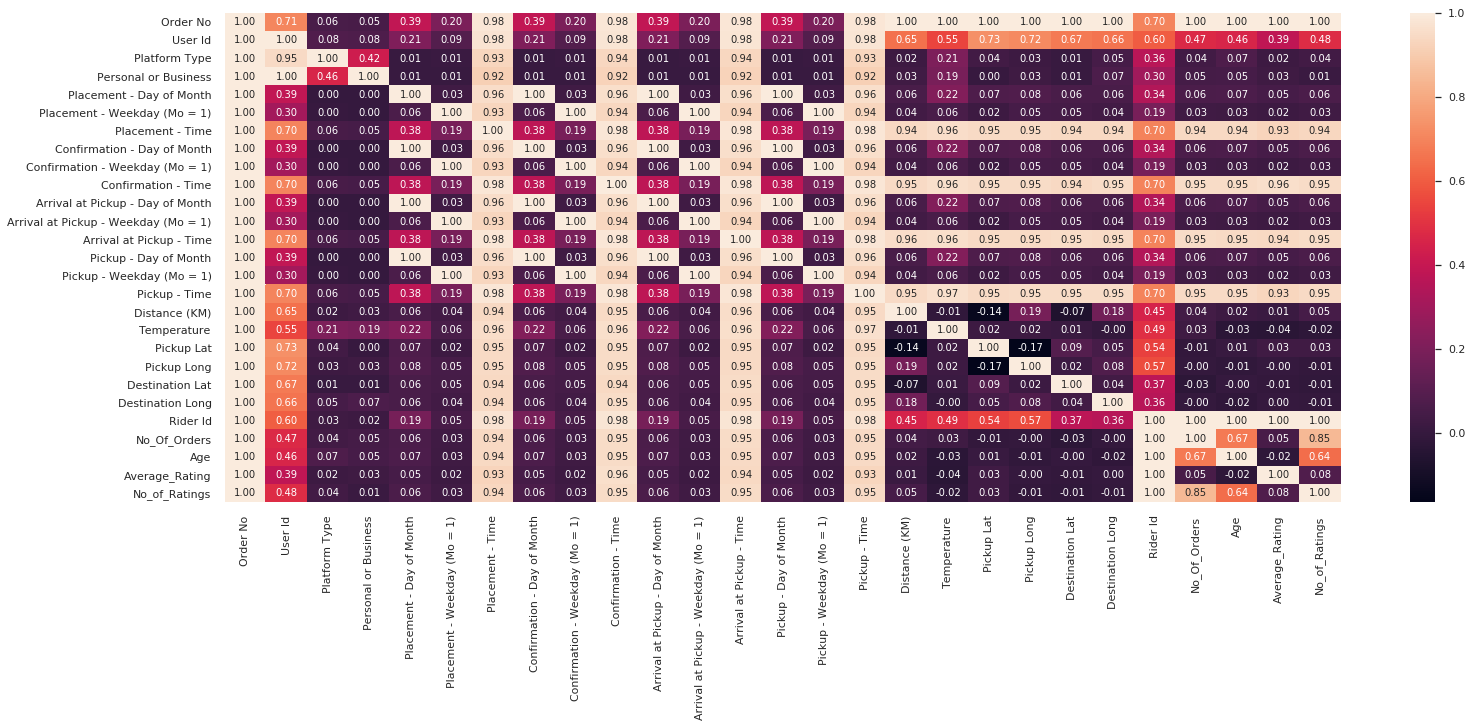

In [94]:
nominal_columns = list(test_zindi.select_dtypes(exclude=["number"]).columns)
associations(test_zindi,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

#### observations :
- Some high correlation like in time variables are due to the larger number of their unique values
- One day month variable is sufficicent
- One week day variable is sufficicent
- Drop platform type and Personal or Business

#### Drop not useful columns

In [158]:
columns_to_drop_both = ['Platform Type', 
       'Personal or Business',
       'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)',
       'Placement - Time', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)',
       'Arrival at Pickup - Time']
columns_to_drop_train = ['Arrival at Destination - Day of Month',
        'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time']
data.drop(columns=columns_to_drop_both + columns_to_drop_train,inplace=True)
test_zindi.drop(columns=columns_to_drop_both,inplace=True)

In [131]:
data.head(6)

Order No       User Id Pickup - Day of Month  \
0   Order_No_4211   User_Id_633                     9   
1  Order_No_27440  User_Id_2642                    18   
2  Order_No_14170  User_Id_3339                    31   
3  Order_No_21727  User_Id_3523                     2   
4   Order_No_8301    User_Id_87                    22   
5  Order_No_10440  User_Id_2801                    29   

  Pickup - Weekday (Mo = 1) Pickup - Time  Distance (KM)  Temperature  \
0                         5   10:27:30 AM            4.0    20.400000   
1                         5    4:13:37 PM           20.0    24.500000   
2                         5    1:33:08 PM            6.0    24.700000   
3                         2    7:38:46 AM           18.0    15.200000   
4                         2   10:59:40 AM            7.0    19.200000   
5                         3   12:25:10 PM           26.0    23.258889   

   Pickup Lat  Pickup Long  Destination Lat  Destination Long      Rider Id  \
0   -1.317755    36.830370        -1.300406         36.829741  Rider_Id_432   
1   -1.326774    36.787807        -1.356237         36.904295  Rider_Id_432   
2   -1.255189    36.782203        -1.273412         36.818206  Rider_Id_432   
3   -1.290315    36.757377        -1.223520         36.802061  Rider_Id_432   
4   -1.273524    36.799220        -1.300431         36.752427  Rider_Id_432   
5   -1.267427    36.787083        -1.343640         36.892534  Rider_Id_432   

   Time from Pickup to Arrival  No_Of_Orders     Age  Average_Rating  \
0                        745.0        1637.0  1309.0            13.8   
1                       2886.0        1637.0  1309.0            13.8   
2                       2615.0        1637.0  1309.0            13.8   
3                       2986.0        1637.0  1309.0            13.8   
4                       1602.0        1637.0  1309.0            13.8   
5                       2313.0        1637.0  1309.0            13.8   

   No_of_Ratings  
0          549.0  
1          549.0  
2          549.0  
3          549.0  
4          549.0  
5          549.0

### Compute distance with geopy

In [159]:
def compute_distance(row):
    src = (row["Pickup Lat"],row["Pickup Long"])
    dest= (row["Destination Lat"],row["Destination Long"])
    return distance.distance(src,dest).km

In [160]:
data["geopy_distance"] = data.apply(compute_distance,axis=1)
test_zindi["geopy_distance"] = test_zindi.apply(compute_distance,axis=1)

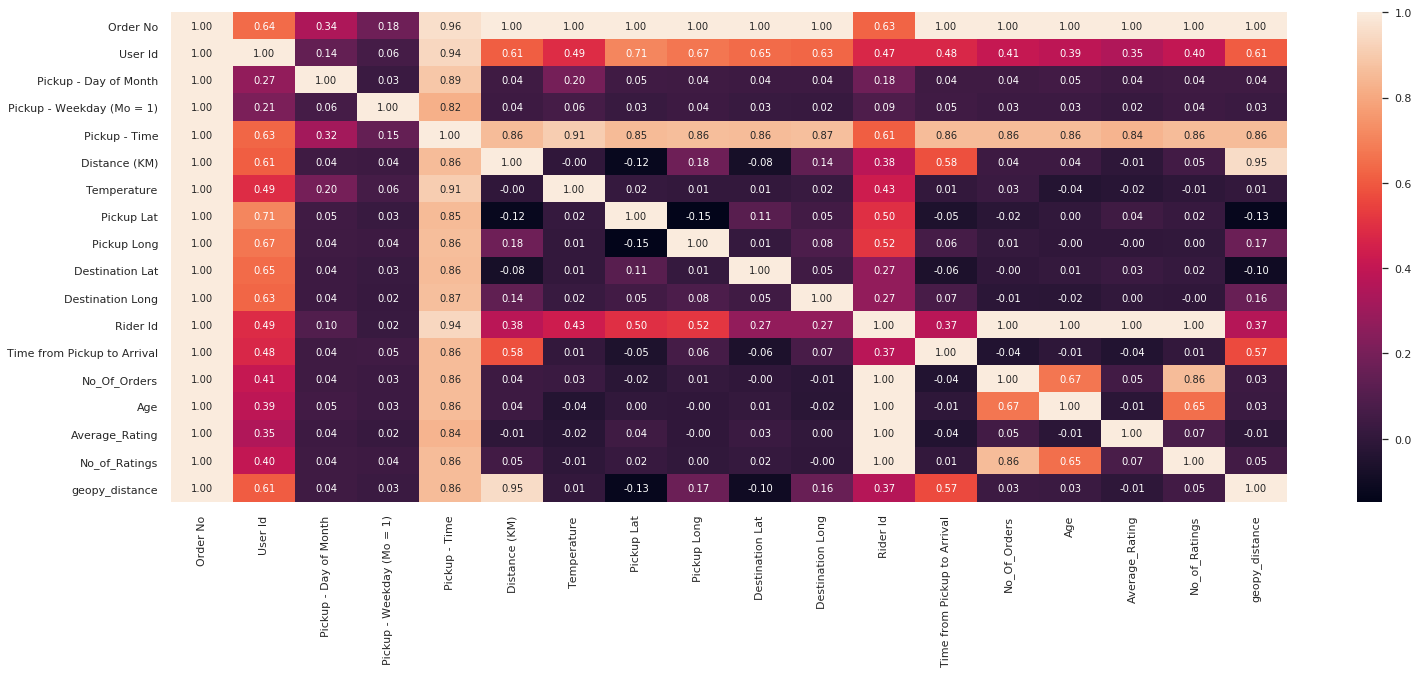

In [136]:
nominal_columns = list(data.select_dtypes(exclude=["number"]).columns)
associations(data,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

### Univariate analysis

#### Time from Pickup to Arrival

In [99]:
data["Time from Pickup to Arrival"].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

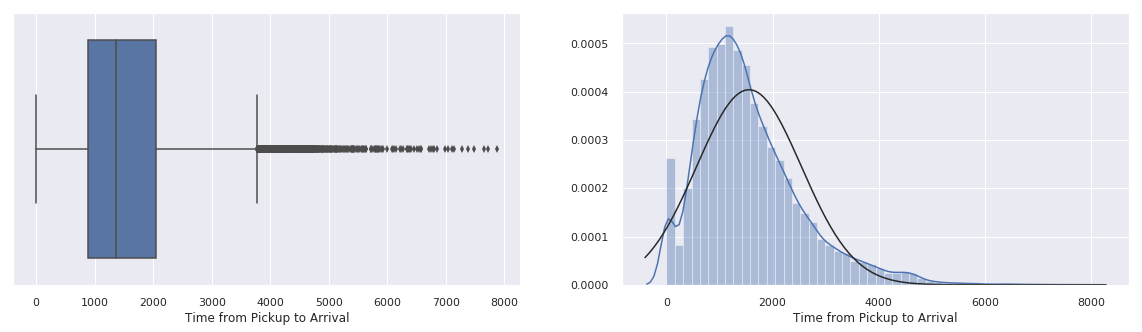

In [101]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data["Time from Pickup to Arrival"],ax=ax[0])
sns.distplot(data["Time from Pickup to Arrival"],fit=norm,ax=ax[1])

In [102]:
data[data["Time from Pickup to Arrival"] == 1].shape

(37, 17)

In [103]:
print(sorted(data["Distance (KM)"].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 44.0, 46.0, 48.0, 49.0]


#### Distance

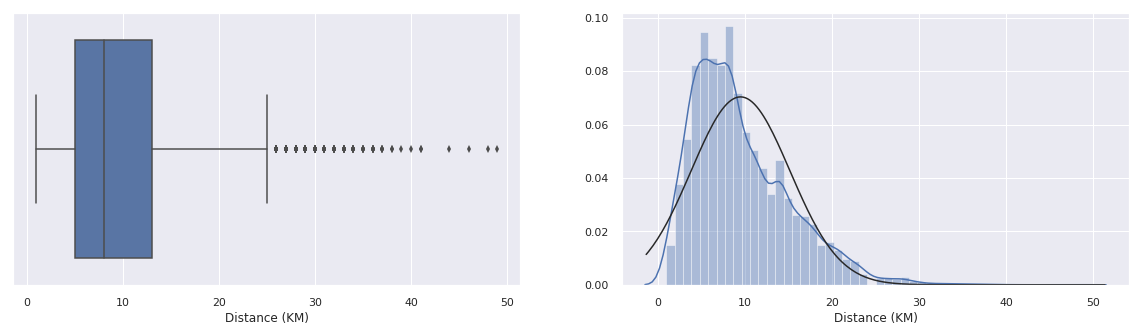

In [104]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data["Distance (KM)"],ax=ax[0])
sns.distplot(data["Distance (KM)"],fit=norm,ax=ax[1])

### Multivariate analysis

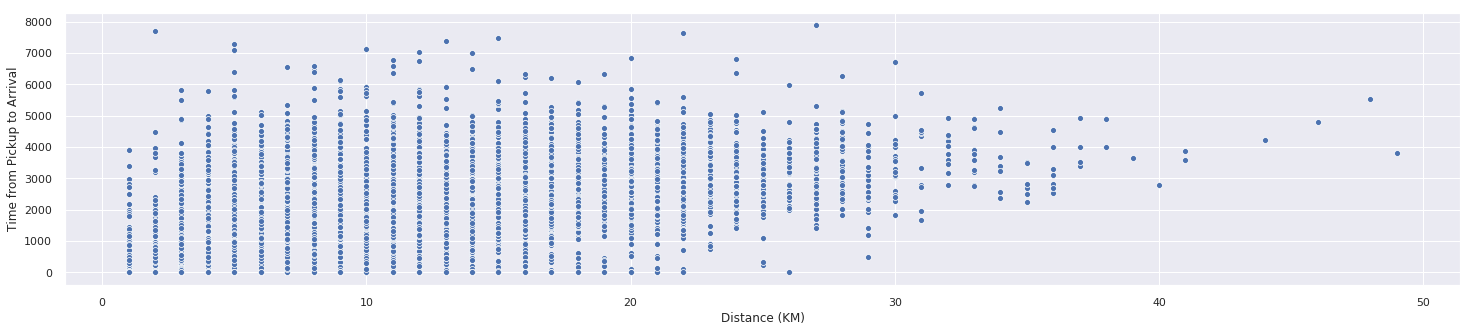

In [105]:
plt.figure(figsize=(25,5))
sns.scatterplot(data["Distance (KM)"], data["Time from Pickup to Arrival"])

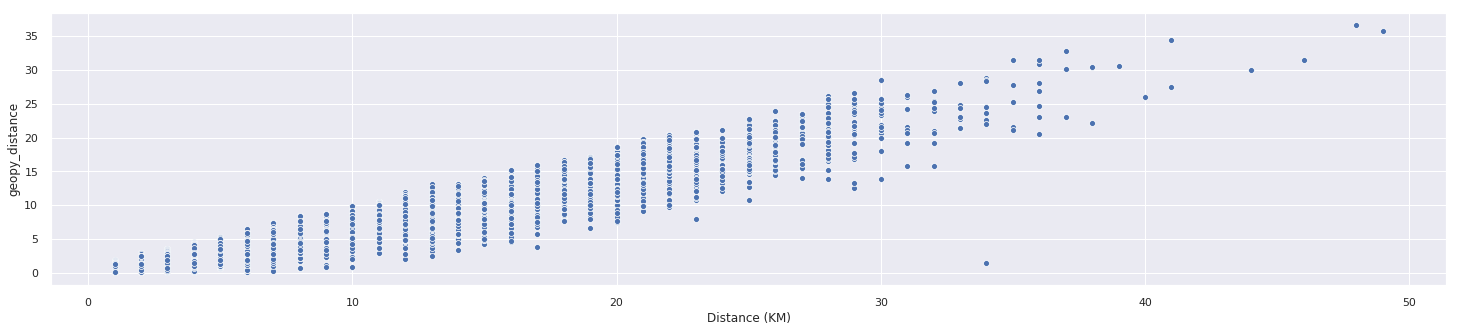

In [137]:
plt.figure(figsize=(25,5))
sns.scatterplot(data["Distance (KM)"], data["geopy_distance"])

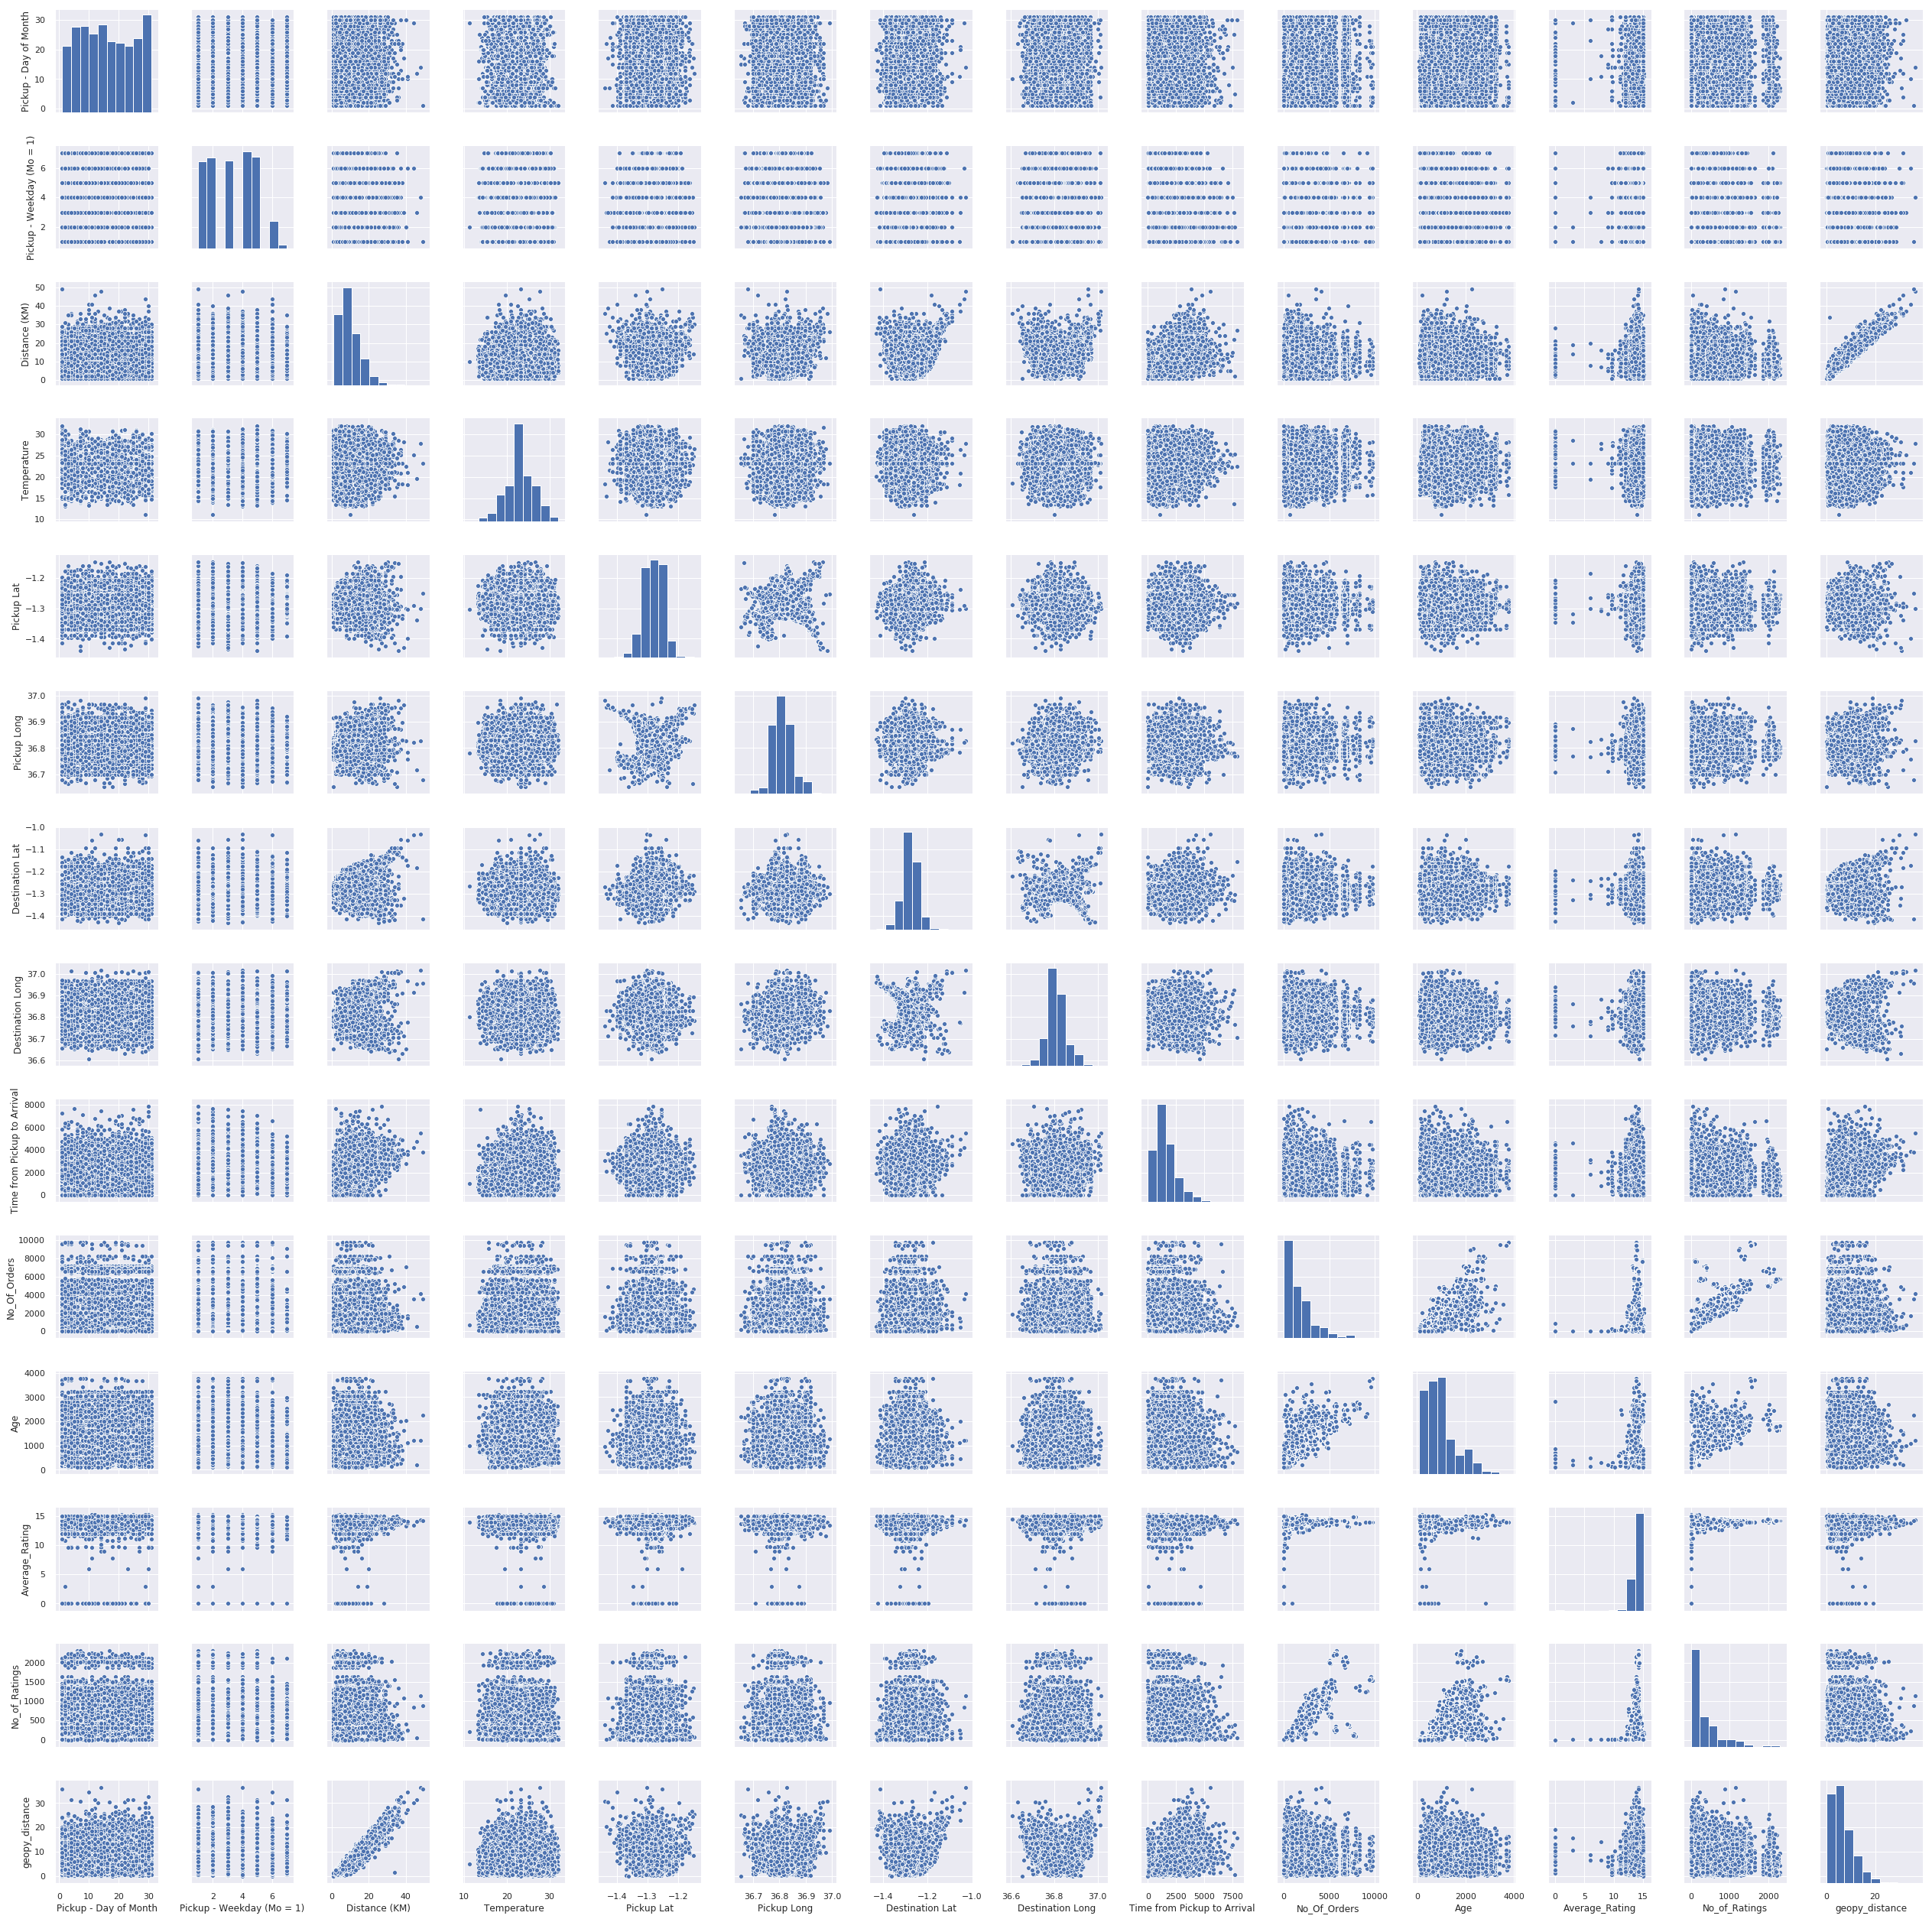

In [138]:
sns.pairplot(data)

### Feature engineering

#### Time to hour

In [308]:
data["Pickup - hour"] = pd.to_datetime(data["Pickup - Time"]).dt.hour.astype("category")
test_zindi["Pickup - hour"] = pd.to_datetime(test_zindi["Pickup - Time"]).dt.hour.astype("category")
data.drop(columns=["Pickup - Time"],inplace=True)
test_zindi.drop(columns=["Pickup - Time"],inplace=True)

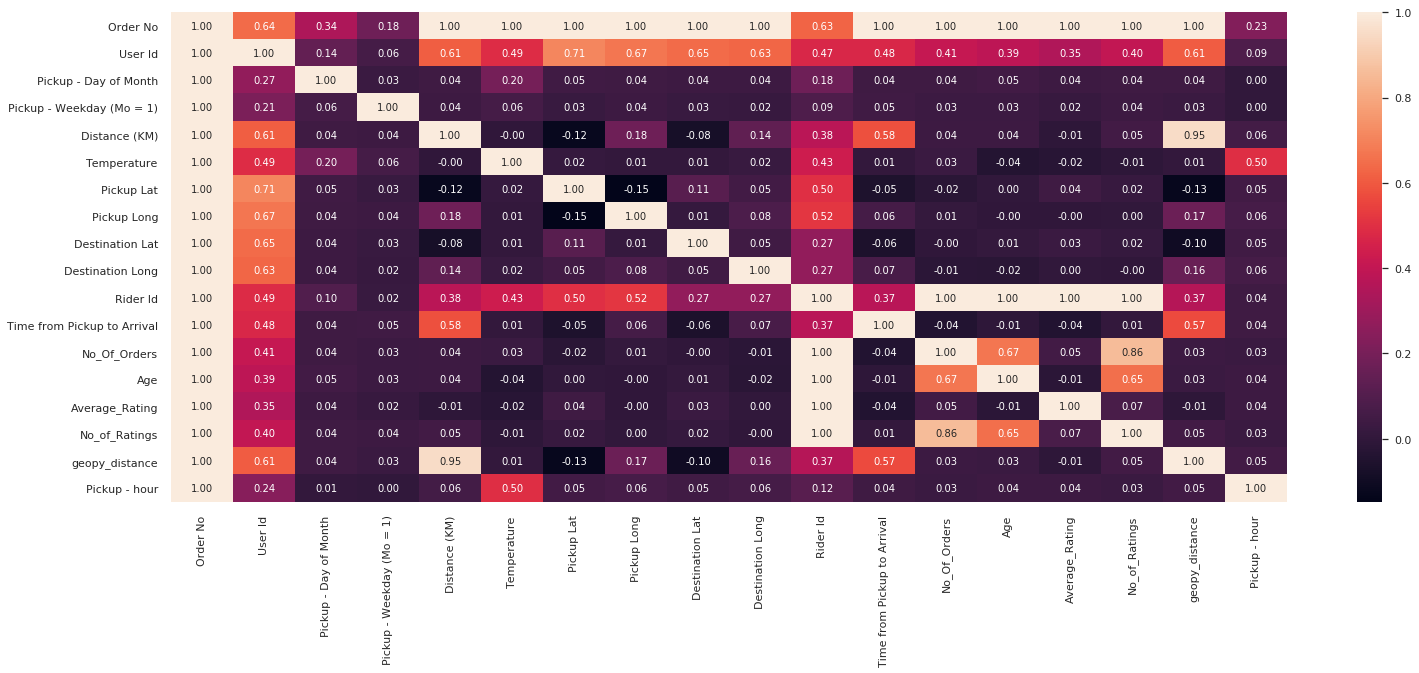

In [171]:
nominal_columns = list(data.select_dtypes(exclude=["number"]).columns)
associations(data,
             nominal_columns=nominal_columns,
             figsize=(25,9),
             theil_u=True) 

### save data and load

In [309]:
# save
data.to_pickle("meetup_data.pkl")
test_zindi.to_pickle("meetup_test.pkl")

In [359]:
data = pd.read_pickle("meetup_data.pkl")
test_zindi = pd.read_pickle("meetup_test.pkl")

### Modeling

#### benchmark models

In [258]:
data.drop(columns=["Order No","Rider Id","User Id"],inplace=True)
test_zindi.drop(columns=["Order No","Rider Id","User Id"],inplace=True)

In [261]:
data = data[data.columns.tolist()[0:8] + data.columns.tolist()[9:] + [data.columns.tolist()[8]]]

In [268]:
data.head().T

0        1        2        3        4
Pickup - Day of Month              9       18       31        2       22
Pickup - Weekday (Mo = 1)          5        5        5        2        2
Distance (KM)                      4       20        6       18        7
Temperature                     20.4     24.5     24.7     15.2     19.2
Pickup Lat                  -1.31775 -1.32677 -1.25519 -1.29031 -1.27352
Pickup Long                  36.8304  36.7878  36.7822  36.7574  36.7992
Destination Lat             -1.30041 -1.35624 -1.27341 -1.22352 -1.30043
Destination Long             36.8297  36.9043  36.8182  36.8021  36.7524
Age                             1309     1309     1309     1309     1309
Average_Rating                  13.8     13.8     13.8     13.8     13.8
No_of_Ratings                    549      549      549      549      549
geopy_distance               1.91959   13.367  4.48491  8.90398  5.99761
Pickup - hour                     10       16       13        7       10
No_Of_Orders                    1637     1637     1637     1637     1637
Time from Pickup to Arrival      745     2886     2615     2986     1602

In [269]:
data_without_short_duration = data[data["Time from Pickup to Arrival"] > 10]
data_without_short_duration.shape,data.shape

((20654, 15), (21201, 15))

##### Imports

In [294]:
from sklearn.linear_model import HuberRegressor,SGDRegressor,ElasticNet, Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

##### Training 

In [173]:
def rmse(y_true,y_preds,extras=None):
    return np.sqrt(mean_squared_error(y_true,y_preds))

In [282]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score

In [270]:
train_x,val_x,train_y,val_y = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3)
train_clean_x,val_clean_x,train_clean_y,val_clean_y = train_test_split(data_without_short_duration.iloc[:,:-1],data_without_short_duration.iloc[:,-1],test_size=0.3)

In [271]:
train_clean_x.shape, train_x.shape

((14457, 14), (14840, 14))

In [273]:
train_clean_x.head()

Pickup - Day of Month Pickup - Weekday (Mo = 1)  Distance (KM)  \
1475                     12                         2           21.0   
10839                     7                         4            5.0   
10707                    12                         1           16.0   
9042                     20                         4            9.0   
11262                     8                         2           17.0   

       Temperature  Pickup Lat  Pickup Long  Destination Lat  \
1475          24.6   -1.255189    36.782203        -1.340776   
10839         27.8   -1.300406    36.829741        -1.316711   
10707         24.0   -1.207546    36.791398        -1.288780   
9042          24.2   -1.279789    36.816939        -1.229521   
11262         23.2   -1.285632    36.767300        -1.319452   

       Destination Long     Age  Average_Rating  No_of_Ratings  \
1475          36.910052  1285.0            13.3          576.0   
10839         36.830156   956.0            14.4          453.0   
10707         36.816831   921.0            14.5          642.0   
9042          36.812043   872.0            13.8          329.0   
11262         36.869396   530.0            13.8          305.0   

       geopy_distance Pickup - hour  No_Of_Orders  
1475        17.088322            13        2588.0  
10839        1.803526            10        2668.0  
10707        9.417873            13        2345.0  
9042         5.585033            11        1450.0  
11262       11.961961            11        1907.0

In [284]:
def rmsle_cv(model,train,y_train,n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(np.mean(rmse))

In [297]:
def benchmark_model(train_x,train_y):
    for Model in [RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor,XGBRegressor,LGBMRegressor, ElasticNet, LinearRegression,HuberRegressor]:
        model = Model()
        model_name = model.__class__.__name__
        err = rmsle_cv(model,train_x,train_y)
        print(f"{model_name} :  cross val loss => {err}")

In [298]:
benchmark_model(train_x,train_y)

RandomForestRegressor :  cross val loss => 816.617564734396
ExtraTreesRegressor :  cross val loss => 819.7650947530165
GradientBoostingRegressor :  cross val loss => 769.0334131812915
XGBRegressor :  cross val loss => 768.1839126398838
LGBMRegressor :  cross val loss => 756.6890298720689
ElasticNet :  cross val loss => 796.052938150316
LinearRegression :  cross val loss => 794.4690990951565
HuberRegressor :  cross val loss => 817.1036342144707


In [303]:
lgbm = LGBMRegressor().fit(train_x,train_y)
xgbm = XGBRegressor().fit(train_x.values,train_y)

rmse(lgbm.predict(val_x),val_y),rmse(xgbm.predict(val_x.values),val_y)

(752.4030629429736, 764.4661383138938)

In [299]:
benchmark_model(train_clean_x,train_clean_y)

RandomForestRegressor :  cross val loss => 808.2556499925224
ExtraTreesRegressor :  cross val loss => 810.6558077217855
GradientBoostingRegressor :  cross val loss => 757.0491932800819
XGBRegressor :  cross val loss => 755.346539169327
LGBMRegressor :  cross val loss => 747.697120682644
ElasticNet :  cross val loss => 783.753712564317
LinearRegression :  cross val loss => 783.036819351548
HuberRegressor :  cross val loss => 805.6942372905908


#### catboost

In [328]:
data = data[data.columns.tolist()[0:11] + data.columns.tolist()[12:] + [data.columns.tolist()[11]]]
data.head()

Order No       User Id Pickup - Day of Month  \
0   Order_No_4211   User_Id_633                     9   
1  Order_No_27440  User_Id_2642                    18   
2  Order_No_14170  User_Id_3339                    31   
3  Order_No_21727  User_Id_3523                     2   
4   Order_No_8301    User_Id_87                    22   

  Pickup - Weekday (Mo = 1)  Distance (KM)  Temperature  Pickup Lat  \
0                         5            4.0         20.4   -1.317755   
1                         5           20.0         24.5   -1.326774   
2                         5            6.0         24.7   -1.255189   
3                         2           18.0         15.2   -1.290315   
4                         2            7.0         19.2   -1.273524   

   Pickup Long  Destination Lat  Destination Long      Rider Id  No_Of_Orders  \
0    36.830370        -1.300406         36.829741  Rider_Id_432        1637.0   
1    36.787807        -1.356237         36.904295  Rider_Id_432        1637.0   
2    36.782203        -1.273412         36.818206  Rider_Id_432        1637.0   
3    36.757377        -1.223520         36.802061  Rider_Id_432        1637.0   
4    36.799220        -1.300431         36.752427  Rider_Id_432        1637.0   

      Age  Average_Rating  No_of_Ratings  geopy_distance Pickup - hour  \
0  1309.0            13.8          549.0        1.919586            10   
1  1309.0            13.8          549.0       13.367010            16   
2  1309.0            13.8          549.0        4.484905            13   
3  1309.0            13.8          549.0        8.903984             7   
4  1309.0            13.8          549.0        5.997613            10   

   Time from Pickup to Arrival  
0                        745.0  
1                       2886.0  
2                       2615.0  
3                       2986.0  
4                       1602.0

In [329]:
data.drop(columns=["Order No"],inplace=True)

In [330]:
train_x,val_x,train_y,val_y = train_test_split(data.iloc[:,:-1],data.iloc[:,-1],test_size=0.3)

In [334]:
# initialize Pool
cat_features = ['Pickup - Day of Month','User Id','Pickup - Weekday (Mo = 1)','Rider Id','Pickup - hour']
train_pool = Pool(train_x,train_y ,
                 cat_features=cat_features
                 )
test_pool = Pool(val_x, 
                cat_features=cat_features
                ) 

# specify the training parameters 
model = CatBoostRegressor(loss_function='RMSE')
#train the model
model.fit(train_pool,silent=True)
# make the prediction using the resulting model
predictions = model.predict(test_pool)
err = rmse(val_y, predictions)
print(f"rmse val error: {err}")

rmse val error: 750.2633628445581


In [360]:
data.head()

Order No       User Id Pickup - Day of Month  \
0   Order_No_4211   User_Id_633                     9   
1  Order_No_27440  User_Id_2642                    18   
2  Order_No_14170  User_Id_3339                    31   
3  Order_No_21727  User_Id_3523                     2   
4   Order_No_8301    User_Id_87                    22   

  Pickup - Weekday (Mo = 1)  Distance (KM)  Temperature  Pickup Lat  \
0                         5            4.0         20.4   -1.317755   
1                         5           20.0         24.5   -1.326774   
2                         5            6.0         24.7   -1.255189   
3                         2           18.0         15.2   -1.290315   
4                         2            7.0         19.2   -1.273524   

   Pickup Long  Destination Lat  Destination Long      Rider Id  \
0    36.830370        -1.300406         36.829741  Rider_Id_432   
1    36.787807        -1.356237         36.904295  Rider_Id_432   
2    36.782203        -1.273412         36.818206  Rider_Id_432   
3    36.757377        -1.223520         36.802061  Rider_Id_432   
4    36.799220        -1.300431         36.752427  Rider_Id_432   

   Time from Pickup to Arrival  No_Of_Orders     Age  Average_Rating  \
0                        745.0        1637.0  1309.0            13.8   
1                       2886.0        1637.0  1309.0            13.8   
2                       2615.0        1637.0  1309.0            13.8   
3                       2986.0        1637.0  1309.0            13.8   
4                       1602.0        1637.0  1309.0            13.8   

   No_of_Ratings  geopy_distance Pickup - hour  
0          549.0        1.919586            10  
1          549.0       13.367010            16  
2          549.0        4.484905            13  
3          549.0        8.903984             7  
4          549.0        5.997613            10

#### Feature importance

In [336]:

# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title,ax=None):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue',ax=ax) \
       .set_title(title, fontsize = 15)

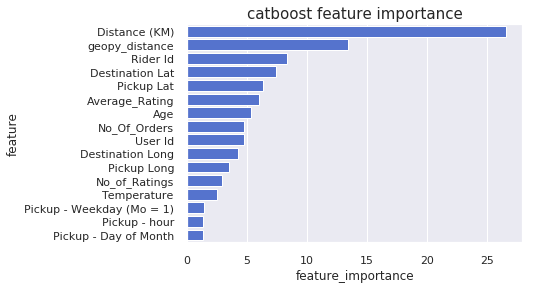

In [337]:
base_imp = imp_df(train_x.columns, model.feature_importances_)
var_imp_plot(base_imp, "catboost feature importance")    
plt.show()

### Submission

#### train on all data

In [384]:
data = pd.read_pickle("meetup_data.pkl")
data.drop(columns=["Order No"],inplace=True)
test_zindi = pd.read_pickle("meetup_test.pkl")

In [385]:
data = data[data.columns.tolist()[0:10] + data.columns.tolist()[11:] + [data.columns.tolist()[10]]]
data_without_short_duration = data[data["Time from Pickup to Arrival"] > 10]
data.head()

User Id Pickup - Day of Month Pickup - Weekday (Mo = 1)  \
0   User_Id_633                     9                         5   
1  User_Id_2642                    18                         5   
2  User_Id_3339                    31                         5   
3  User_Id_3523                     2                         2   
4    User_Id_87                    22                         2   

   Distance (KM)  Temperature  Pickup Lat  Pickup Long  Destination Lat  \
0            4.0         20.4   -1.317755    36.830370        -1.300406   
1           20.0         24.5   -1.326774    36.787807        -1.356237   
2            6.0         24.7   -1.255189    36.782203        -1.273412   
3           18.0         15.2   -1.290315    36.757377        -1.223520   
4            7.0         19.2   -1.273524    36.799220        -1.300431   

   Destination Long      Rider Id  No_Of_Orders     Age  Average_Rating  \
0         36.829741  Rider_Id_432        1637.0  1309.0            13.8   
1         36.904295  Rider_Id_432        1637.0  1309.0            13.8   
2         36.818206  Rider_Id_432        1637.0  1309.0            13.8   
3         36.802061  Rider_Id_432        1637.0  1309.0            13.8   
4         36.752427  Rider_Id_432        1637.0  1309.0            13.8   

   No_of_Ratings  geopy_distance Pickup - hour  Time from Pickup to Arrival  
0          549.0        1.919586            10                        745.0  
1          549.0       13.367010            16                       2886.0  
2          549.0        4.484905            13                       2615.0  
3          549.0        8.903984             7                       2986.0  
4          549.0        5.997613            10                       1602.0

In [386]:
all_train_x = data.iloc[:,:-1]
all_train_y = data.iloc[:,-1]

all_train_clean_x = data_without_short_duration.iloc[:,:-1]
all_train_clean_y = data_without_short_duration.iloc[:,-1]

In [387]:
cat_features = ['Pickup - Day of Month','User Id','Pickup - Weekday (Mo = 1)','Rider Id','Pickup - hour']
all_train_pool = Pool(all_train_x,all_train_y ,
                 cat_features=cat_features
                 )
all_train_clean_pool = Pool(all_train_clean_x,all_train_clean_y ,
                 cat_features=cat_features
                 )
model = CatBoostRegressor(loss_function='RMSE')
model_clean = CatBoostRegressor(loss_function='RMSE')

model.fit(all_train_pool,silent=True)
model_clean.fit(all_train_clean_pool,silent=True)

In [339]:
submission.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                        567.0
1  Order_No_12736                       4903.0
2    Order_No_768                       5649.0
3  Order_No_15332                          NaN
4  Order_No_21373                          NaN

In [378]:
len(set(test_zindi["Order No"]).intersection(set(submission["Order_No"]))) == test_zindi.shape[0]

True

In [388]:
order_no = test_zindi["Order No"]
test_zindi.drop(columns=["Order No"],inplace=True)

In [389]:
submission_pool = Pool(test_zindi, 
                cat_features=cat_features
                ) 

In [390]:
predictions = model_clean.predict(submission_pool)
df_submission = pd.DataFrame()
df_submission["Order_No"] = order_no
df_submission["Time from Pickup to Arrival"] = predictions

In [391]:
df_submission.head()

Order_No  Time from Pickup to Arrival
0  Order_No_19248                  1697.942252
1   Order_No_2699                  2848.895125
2  Order_No_21486                  1872.283402
3  Order_No_19336                  2384.124793
4  Order_No_20374                  2573.288833

In [392]:
df_submission.to_csv("clean_catboost.csv",index=False)

### TODO

- More data exploration
- analyze riders
- dimensionality reduction
- Finetune hyperparams
- model stacking
- One hot encode features
- create more features
- get features from other data sources
- loop over these
- Give me your ideas pls ..